In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
sns.set_style("white")
plt.rc('font', **{'family': 'Microsoft YaHei, SimHei'})  # 设置中文字体的支持
# sns.set(font='SimHei')  # 解决Seaborn中文显示问题，但会自动添加背景灰色网格
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
from sklearn import preprocessing

In [2]:
train=pd.read_csv(r"C:\Users\m1533\Desktop\研一下\python\项目\数据\used_car_train_20200313.csv",sep=" ")
test=pd.read_csv(r"C:\Users\m1533\Desktop\研一下\python\项目\数据\used_car_testB_20200421.csv",sep=" ")
print('Train data shape:',train.shape)
print('TestA data shape:',test.shape)

Train data shape: (150000, 31)
TestA data shape: (50000, 30)


In [3]:
train.to_csv('train1.csv', index=0)

# 描述性统计

In [4]:
train.info()#数据类型

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [5]:
train.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [6]:
train.describe().T#数据相关统计量

,count,mean,std,min,25%,50%,75%,max
SaleID,150000.0,7.499950e+04,43301.414527,0.000000e+00,3.749975e+04,7.499950e+04,1.124992e+05,1.499990e+05
name,150000.0,6.834917e+04,61103.875095,0.000000e+00,1.115600e+04,5.163800e+04,1.188412e+05,1.968120e+05
regDate,150000.0,2.003417e+07,53649.879255,1.991000e+07,1.999091e+07,2.003091e+07,2.007111e+07,2.015121e+07
model,149999.0,4.712902e+01,49.536040,0.000000e+00,1.000000e+01,3.000000e+01,6.600000e+01,2.470000e+02
brand,150000.0,8.052733e+00,7.864956,0.000000e+00,1.000000e+00,6.000000e+00,1.300000e+01,3.900000e+01
bodyType,145494.0,1.792369e+00,1.760640,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,7.000000e+00
fuelType,141320.0,3.758421e-01,0.548677,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,6.000000e+00
gearbox,144019.0,2.249425e-01,0.417546,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
power,150000.0,1.193165e+02,177.168419,0.000000e+00,7.500000e+01,1.100000e+02,1.500000e+02,1.931200e+04
kilometer,150000.0,1.259716e+01,3.919576,5.000000e-01,1.250000e+01,1.500000e+01,1.500000e+01,1.500000e+01


## 缺失值

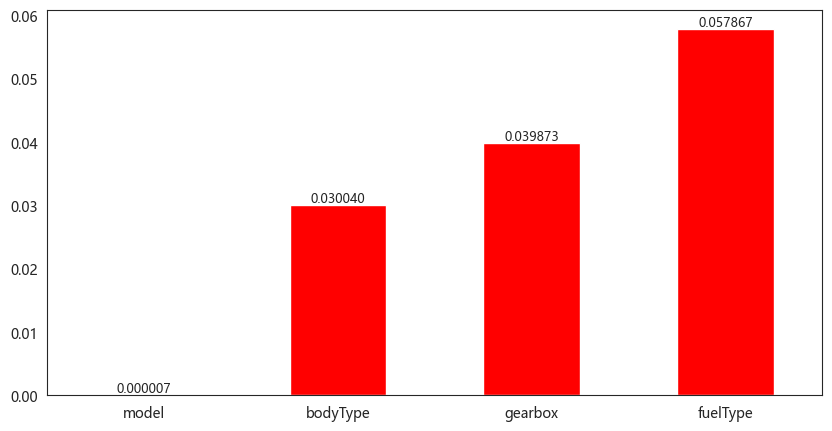

In [7]:
missing=train.isnull().sum()/len(train)
missing=missing[missing>0]
missing.sort_values(inplace=True)
index=np.arange(len(missing))
num_list=list(pd.DataFrame(missing).iloc[:,0])
fig=plt.figure(figsize=(10,5))
missing.plot.bar(color='red')
plt.xticks(rotation=0)
for a,b in zip(index,num_list):
    plt.text(a,b,'%.6f'%b,ha='center',va='bottom',fontsize=9);#柱子上的数字显示

缺失率较低，可以填充删除即可（一般超过5%-30%较多），如果很小一般选择填充，如果使用lgb等树模型可以直接空缺，让树自己去优化，但如果nan存在的过多、可以考虑删掉

## 数字变量分布情况

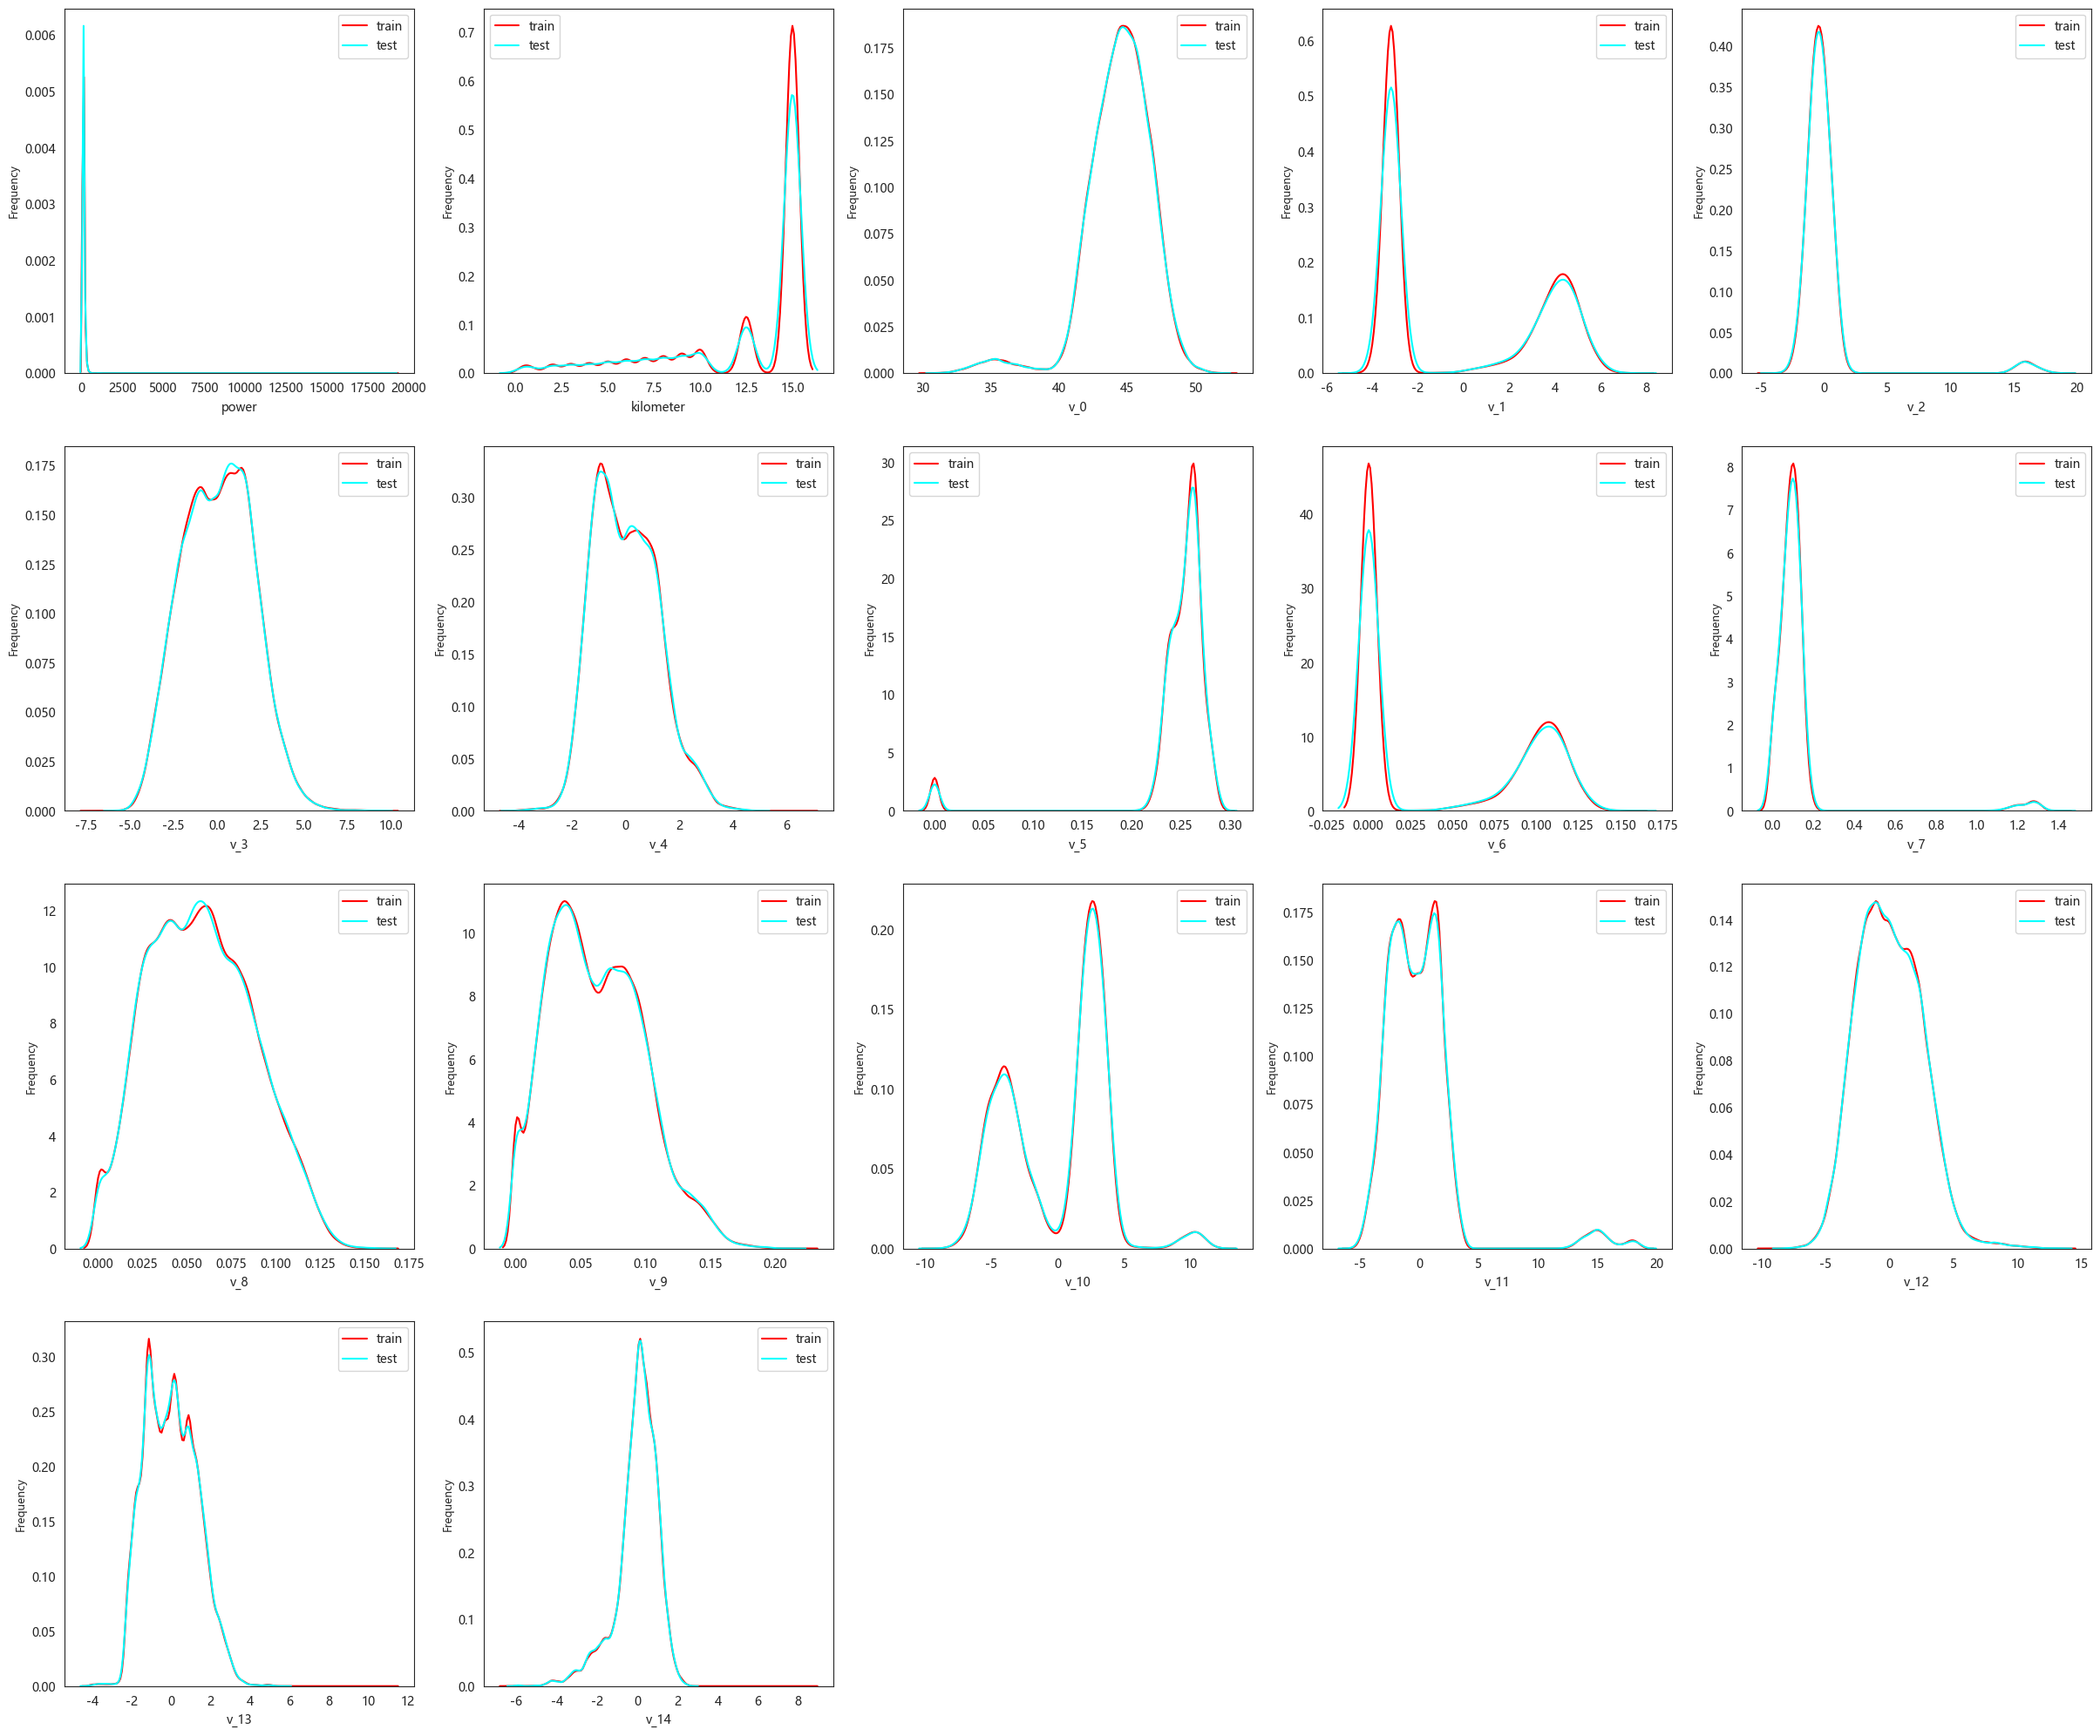

In [8]:
# 分离数值变量与分类变量
#Nu_feature = list(train.select_dtypes(include=[np.number]).columns)  # 数值变量
#Ca_feature = list(train.select_dtypes(include=[np.object]).columns)
Nu_feature = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9',
              'v_10', 'v_11', 'v_12', 'v_13','v_14']
Ca_feature = ['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode']
plt.figure(figsize=(30,25))
i=1
for col in Nu_feature:
    ax=plt.subplot(4,5,i)
    ax=sns.kdeplot(train[col],color='red')
    ax=sns.kdeplot(test[col],color='cyan')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency',fontsize=9)
    ax=ax.legend(['train','test'])
    i+=1
plt.show()

可以看出测试集和训练集数据分布一致

### 偏度和峰度

In [9]:
for col in Nu_feature:
    print('{:15}'.format(col),
         'skewness: {:05.2f}'.format(train[col].skew()),
          '   ',
         'kurtosis: {:06.2f}'.format(train[col].kurt())
         )

power           skewness: 65.86     kurtosis: 5733.45
kilometer       skewness: -1.53     kurtosis: 001.14
v_0             skewness: -1.32     kurtosis: 003.99
v_1             skewness: 00.36     kurtosis: -01.75
v_2             skewness: 04.84     kurtosis: 023.86
v_3             skewness: 00.11     kurtosis: -00.42
v_4             skewness: 00.37     kurtosis: -00.20
v_5             skewness: -4.74     kurtosis: 022.93
v_6             skewness: 00.37     kurtosis: -01.74
v_7             skewness: 05.13     kurtosis: 025.85
v_8             skewness: 00.20     kurtosis: -00.64
v_9             skewness: 00.42     kurtosis: -00.32
v_10            skewness: 00.03     kurtosis: -00.58
v_11            skewness: 03.03     kurtosis: 012.57
v_12            skewness: 00.37     kurtosis: 000.27
v_13            skewness: 00.27     kurtosis: -00.44
v_14            skewness: -1.19     kurtosis: 002.39


Text(0.5, 1.0, '二手车价格直方图')

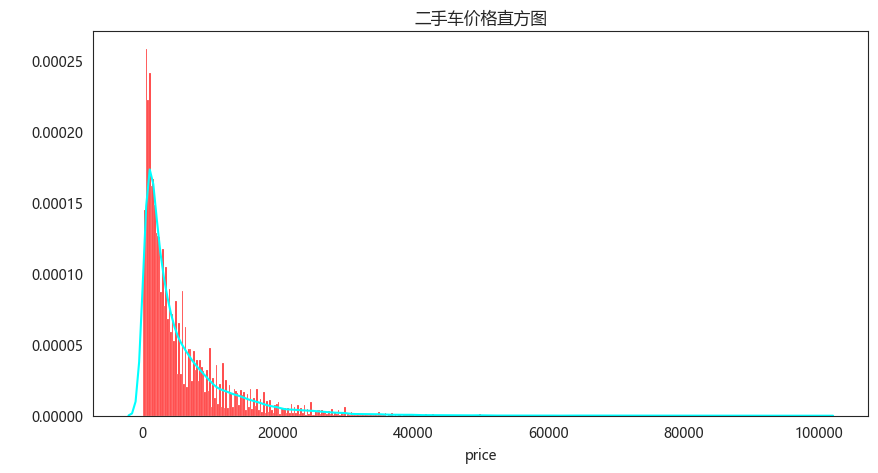

In [10]:
fig=plt.figure(figsize=(10,5))
sns.histplot(data=train,x='price',color='red',stat='density')
sns.kdeplot(data=train,x='price',color='cyan')#这里用不了kde_kws，所以用这种组合形式修改颜色
plt.ylabel(" ")
plt.title("二手车价格直方图")

我们发现，二手车价格是一个严重的右偏分布，所以在后续需要对数据进行处理

## 数字特征分析

* 相关性分析
* 查看几个特征的偏度和峰值
* 每个数字特征的分布可视化
* 数字特征相互之间的关系可视化
* 多变量互相回归关系可视化

### 相关性分析

In [11]:
Nu_feature.append('price')

<AxesSubplot:>

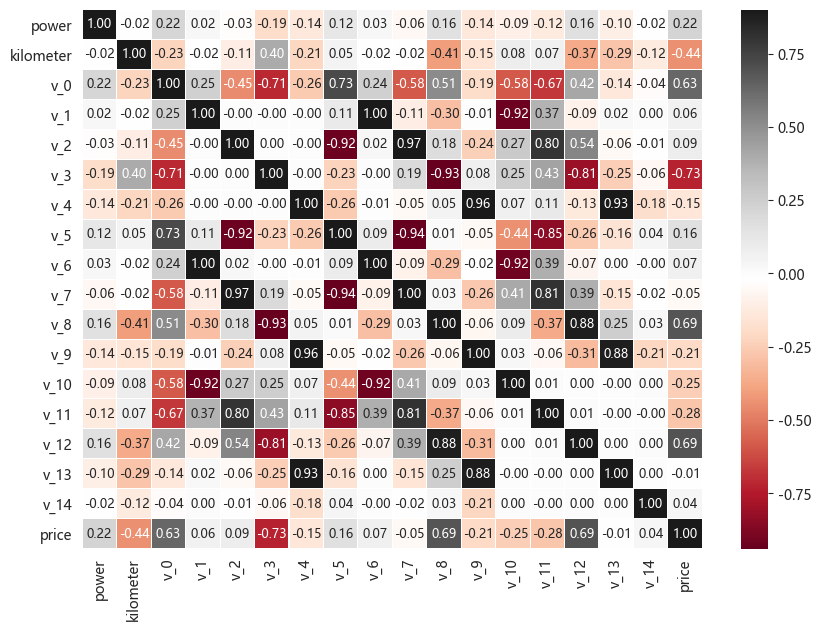

In [12]:
price_nu=train[Nu_feature]
correlation=price_nu.corr()
plt.figure(figsize=(10,7))
sns.heatmap(correlation,linewidths=0.05, cmap="RdGy",vmax=0.9,annot=True, fmt=".2f",annot_kws={'size':9})#分类数据和连续数据是不可以用pearson相关系数度量的

* 首先，price与kilometer以及v_3有弱负相关性，与v_0以及v_8、v_12有弱的正相关性
* v_8、v_12有较强的正相关性，做回归时需要删除一个否则会有多重共线性问题
* v_3与v_8、v_12有较强的负相关性，同样需要删除
* power变量与其他变量不相关

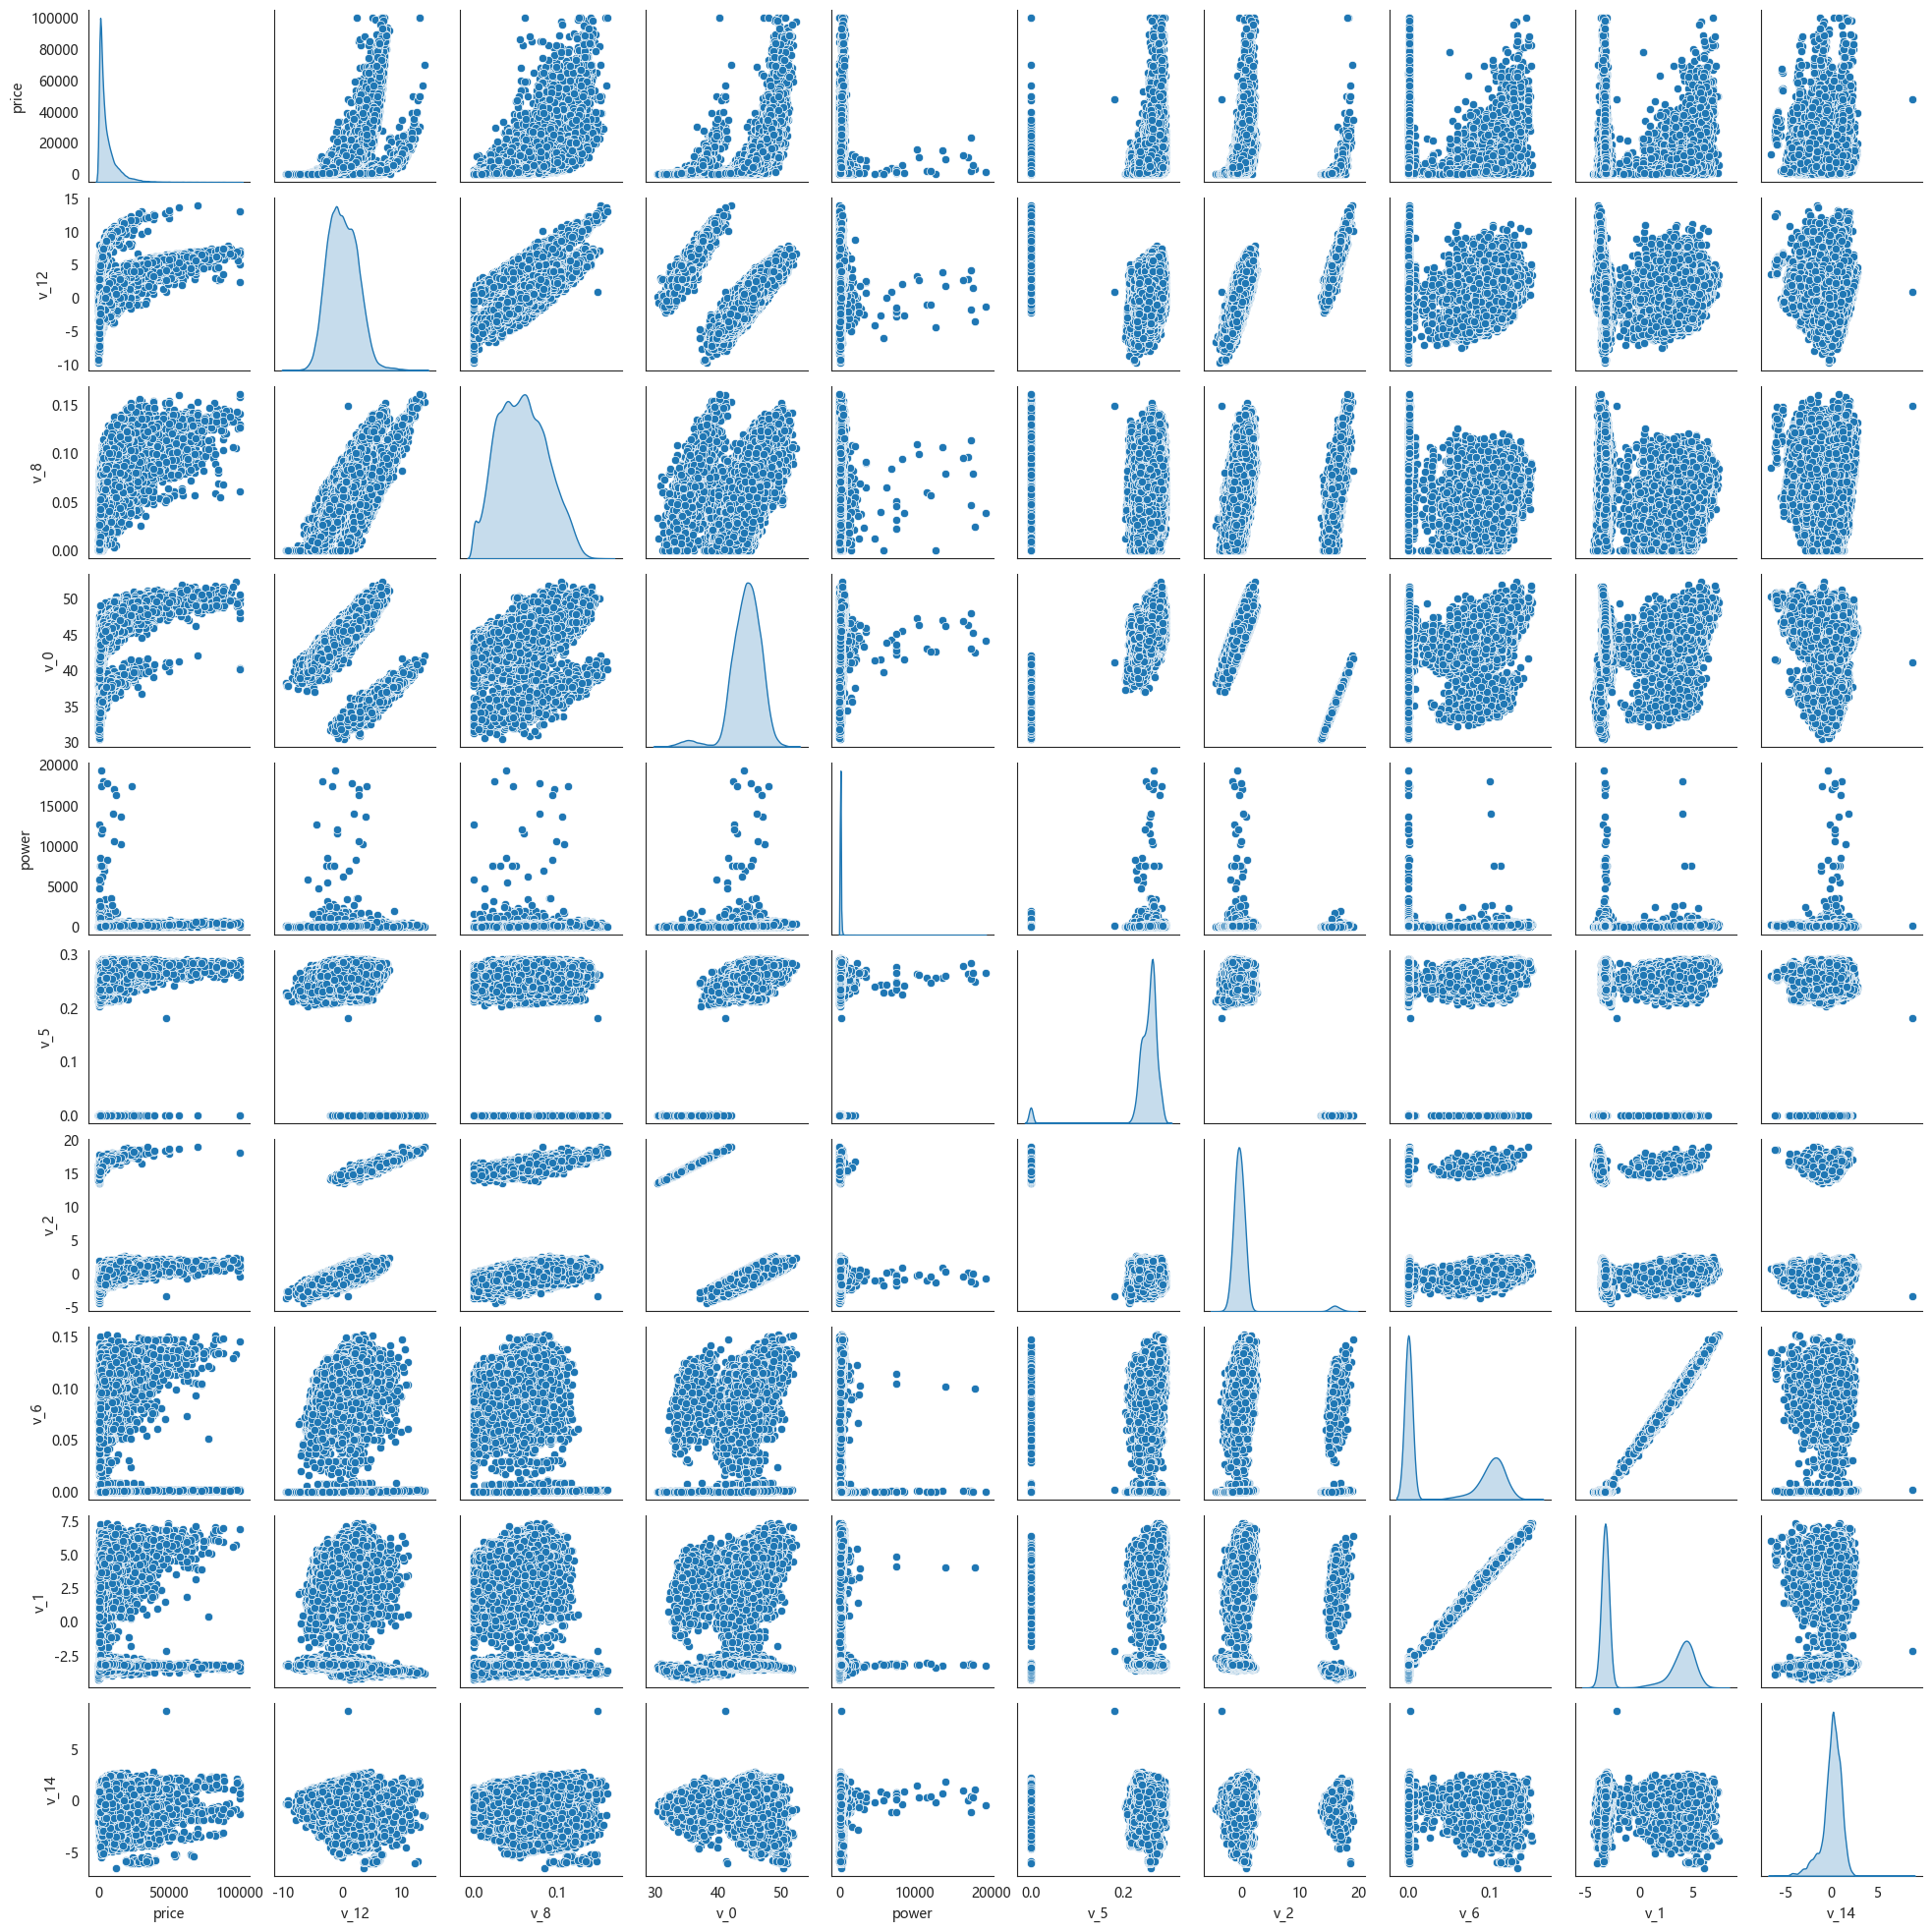

In [13]:
#数字特征相互之间的关系可视化
columns = ['price', 'v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14']
sns.pairplot(train[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

从图上可以看出，v8v12以及v2v0、v1v6有明显的正相关性

<AxesSubplot:xlabel='v_13', ylabel='price'>

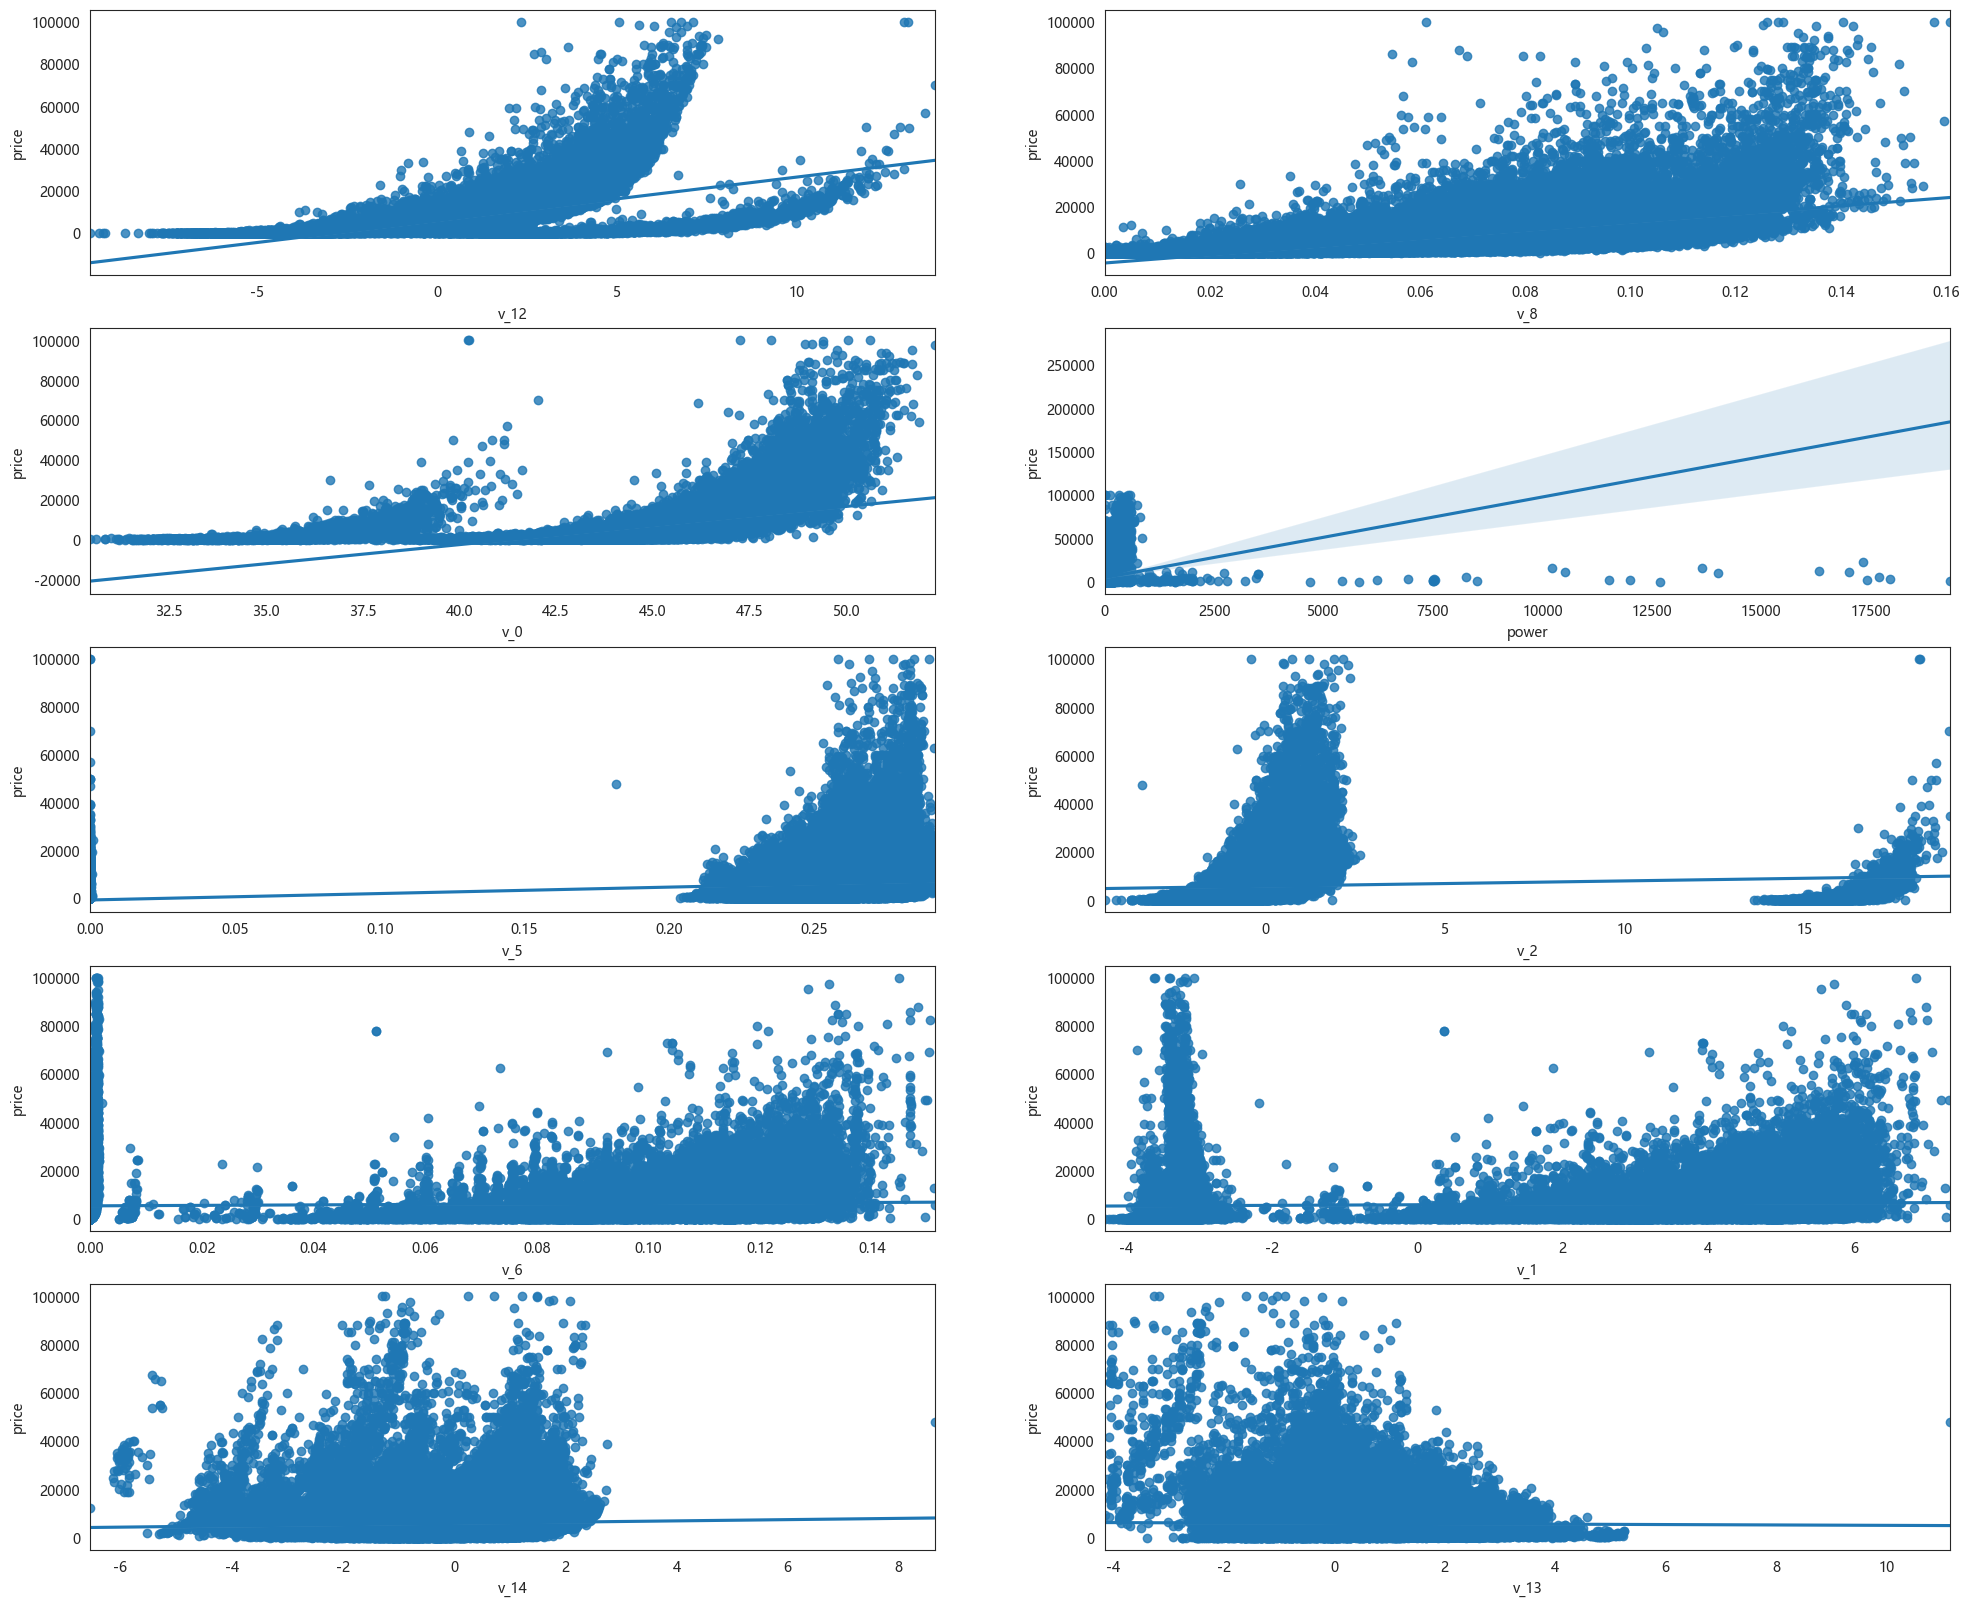

In [14]:
#多变量互相回归关系可视化
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(24, 20))
sns.regplot(x='v_12',y = 'price', data = train,scatter= True, fit_reg=True, ax=axes[0][0])
sns.regplot(x='v_8',y = 'price',data = train,scatter= True, fit_reg=True, ax=axes[0][1])

sns.regplot(x='v_0',y = 'price',data = train,scatter= True, fit_reg=True, ax=axes[1][0])

sns.regplot(x='power',y = 'price',data = train,scatter= True, fit_reg=True, ax=axes[1][1])

sns.regplot(x='v_5',y = 'price',data = train,scatter= True, fit_reg=True, ax=axes[2][0])

sns.regplot(x='v_2',y = 'price',data = train,scatter= True, fit_reg=True, ax=axes[2][1])

sns.regplot(x='v_6',y = 'price',data = train,scatter= True, fit_reg=True, ax=axes[3][0])

sns.regplot(x='v_1',y = 'price',data = train,scatter= True, fit_reg=True, ax=axes[3][1])

sns.regplot(x='v_14',y = 'price',data = train,scatter= True, fit_reg=True, ax=axes[4][0])

sns.regplot(x='v_13',y = 'price',data = train,scatter= True, fit_reg=True, ax=axes[4][1])

可见，未经过处理的price数据与其他数据线性关系并不显著。

In [15]:
import pandas_profiling
# pfr = pandas_profiling.ProfileReport(train)
# pfr.to_file("./example.html")

# 数据清洗

## 缺失值处理
* 由于缺失数量较少所以可以插补
* 缺失不处理可以用于Xgboost这样的树模型
* 异常值处理

## 异常值处理

### 箱线图和3sigma剔除异常值

In [16]:
def outliers_proc(data, col_name, scale=3):
    """
    用于清洗异常值，默认用 box_plot（scale=3）进行清洗
    :param data: 接收 pandas 数据格式
    :param col_name: pandas 列名
    :param scale: 尺度
    :return:
    """

    def box_plot_outliers(data_ser, box_scale):
        """
        利用箱线图去除异常值
        :param data_ser: 接收 pandas.Series 数据格式
        :param box_scale: 箱线图尺度，
        :return:
        """
        iqr = box_scale * (data_ser.quantile(0.75) - data_ser.quantile(0.25))
        val_low = data_ser.quantile(0.25) - iqr
        val_up = data_ser.quantile(0.75) + iqr
        rule_low = (data_ser < val_low)#输出是True or False
        rule_up = (data_ser > val_up)
        return (rule_low, rule_up), (val_low, val_up)

    data_n = data.copy()
    data_series = data_n[col_name]
    rule, value = box_plot_outliers(data_series, box_scale=scale)
    index = np.arange(data_series.shape[0])[rule[0] | rule[1]]
    print("Delete number is: {}".format(len(index)))
    data_n = data_n.drop(index)
    data_n.reset_index(drop=True, inplace=True)
    print("Now column number is: {}".format(data_n.shape[0]))
    index_low = np.arange(data_series.shape[0])[rule[0]]
    outliers = data_series.iloc[index_low]
    print("Description of data less than the lower bound is:")
    print(pd.Series(outliers).describe())
    index_up = np.arange(data_series.shape[0])[rule[1]]
    outliers = data_series.iloc[index_up]
    print("Description of data larger than the upper bound is:")
    print(pd.Series(outliers).describe())
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.boxplot(y=data[col_name], data=data, palette="Set1", ax=ax[0])
    sns.boxplot(y=data_n[col_name], data=data_n, palette="Set1", ax=ax[1])
    return data_n
#train = outliers_proc(train, 'power', scale=3) 不做异常值因为用长尾截断了

### box-cox转换
* Box-Cox变换即将连续的响应变量数据转换为满足正态分布的数据
* 需要对测试集的预测值进行反Box-Cox变换

In [17]:
from scipy.stats import boxcox
#from scipy.special import inv_boxcox 逆变换
#y = inv_boxcox(x1, lambda)
b_price,lambda0=boxcox(train['price'], lmbda=None, alpha=None)

In [18]:
b_price=pd.Series(b_price.tolist())
train1=pd.concat([train,b_price],axis=1)

price我们已知严重有偏所以需要做处理，由于满足幂律分布所以也可以做np.log1p()对数变换

### 长尾截断

In [19]:
train['power'][train['power']>600] = 600
train['power'][train['power']<1] = 1
train['v_13'][train['v_13']>6] = 6
train['v_14'][train['v_14']>4] = 4

### 特征标准化&归一化

In [20]:
train[Nu_feature].describe().T

,count,mean,std,min,25%,50%,75%,max
power,150000.0,116.946500,69.933040,1.000000,75.000000,110.000000,150.000000,600.000000
kilometer,150000.0,12.597160,3.919576,0.500000,12.500000,15.000000,15.000000,15.000000
v_0,150000.0,44.406268,2.457548,30.451976,43.135799,44.610266,46.004721,52.304178
v_1,150000.0,-0.044809,3.641893,-4.295589,-3.192349,-3.052671,4.000670,7.320308
v_2,150000.0,0.080765,2.929618,-4.470671,-0.970671,-0.382947,0.241335,19.035496
v_3,150000.0,0.078833,2.026514,-7.275037,-1.462580,0.099722,1.565838,9.854702
v_4,150000.0,0.017875,1.193661,-4.364565,-0.921191,-0.075910,0.868758,6.829352
v_5,150000.0,0.248204,0.045804,0.000000,0.243615,0.257798,0.265297,0.291838
v_6,150000.0,0.044923,0.051743,0.000000,0.000038,0.000812,0.102009,0.151420
v_7,150000.0,0.124692,0.201410,0.000000,0.062474,0.095866,0.125243,1.404936


我们可以看到，数字特征的量纲差距不大，所以不用处理

### 数据分桶
* 将多个数量值分成少量的桶，可以加快运算速度，增强鲁棒性

In [21]:
train['train']=1
test['train']=0
data=pd.concat([train,test],ignore_index=True,sort=False)
bin = [i*10 for i in range(31)]
data['power_bin'] = pd.cut(data['power'], bin, labels=False)#等宽法
data[['power_bin', 'power']].head()

,power_bin,power
0,5.0,60
1,0.0,1
2,16.0,163
3,19.0,193
4,6.0,68


<AxesSubplot:ylabel='Frequency'>

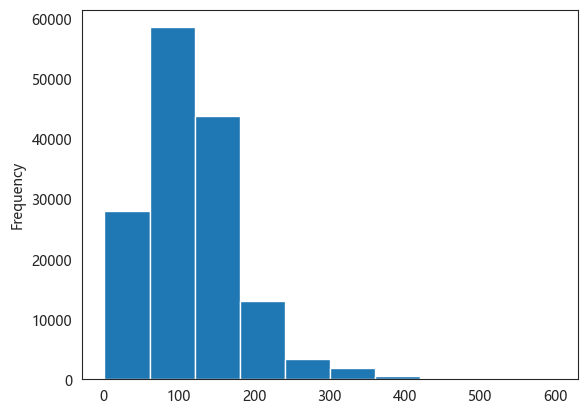

In [22]:
train['power'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

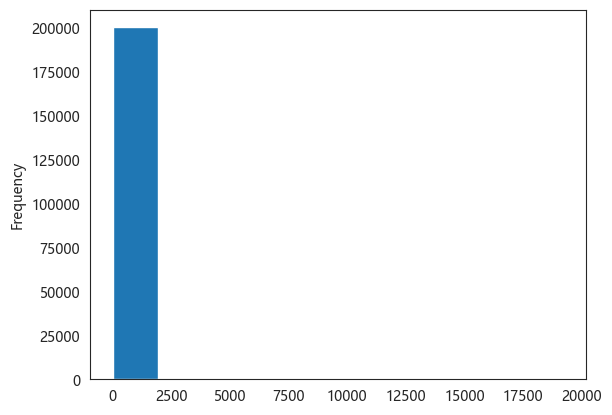

In [23]:
data['power'].plot.hist()
#测试集power的分布与原分布很类似，所以可能不是异常行为，而是分布就长得这么难看，所以不能采用前面箱线图或者3sigma原则删掉，用长尾截断
#总体power分布难看，是因为测试集中的异常值

## 构造特征

In [24]:
# 训练集和测试集放在一起，方便构造特征
# 构造时间特征
data['used_time_day']=(pd.to_datetime(data['creatDate'],format='%Y%m%d',errors='coerce')- 
                   pd.to_datetime(data['regDate'],format='%Y%m%d',errors='coerce')).dt.days#二手车使用天数
data['used_time_year'] = round(data['used_time_day'] / 365, 1)#二手车使用年数
# 将object格式转变为时间格式
#可以通过days取差值，还可以用dt.weekofyear dt.dayofweek等取其他的东西
#数据里有时间出错的格式，所以我们需要 errors='coerce'，这时不满足的会用nan填充

In [25]:
data['used_time_day'].isnull().sum()

15083

In [26]:
data['used_time_day'].isnull().sum()/len(data)#缺失数据占到7.5%，占比较大不能删掉，但是在树模型中可以处理缺失值

0.075415

In [27]:
data.to_csv('data_for_tree.csv', index=0)

### 特征交叉，特征组合

In [28]:
num_cols = [0,2,3,6,8,10,12,14]
for index, value in enumerate(num_cols):
    for j in num_cols[index+1:]:
        data['new'+str(value)+'*'+str(j)]=data['v_'+str(value)]*data['v_'+str(j)]
        data['new'+str(value)+'+'+str(j)]=data['v_'+str(value)]+data['v_'+str(j)]
        data['new'+str(value)+'-'+str(j)]=data['v_'+str(value)]-data['v_'+str(j)]
        
num_cols1 = [3,5,1,11]
for index, value in enumerate(num_cols1):
    for j in num_cols1[index+1:]:
        data['new'+str(value)+'-'+str(j)]=data['v_'+str(value)]-data['v_'+str(j)]
        
for i in range(15):
    data['new'+str(i)+'*year']=data['v_'+str(i)] * data['used_time_year']

### 平均数编码

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold,KFold
from itertools import product
class MeanEncoder:
    def __init__(self, categorical_features, n_splits=10, target_type='classification', prior_weight_func=None):
        """
        :param categorical_features: list of str, the name of the categorical columns to encode
 
        :param n_splits: the number of splits used in mean encoding
 
        :param target_type: str, 'regression' or 'classification'
 
        :param prior_weight_func:
        a function that takes in the number of observations, and outputs prior weight
        when a dict is passed, the default exponential decay function will be used:
        k: the number of observations needed for the posterior to be weighted equally as the prior
        f: larger f --> smaller slope
        """
 
        self.categorical_features = categorical_features
        self.n_splits = n_splits
        self.learned_stats = {}
 
        if target_type == 'classification':
            self.target_type = target_type
            self.target_values = []
        else:
            self.target_type = 'regression'
            self.target_values = None
 
        if isinstance(prior_weight_func, dict):
            self.prior_weight_func = eval('lambda x: 1 / (1 + np.exp((x - k) / f))', dict(prior_weight_func, np=np))
        elif callable(prior_weight_func):
            self.prior_weight_func = prior_weight_func
        else:
            self.prior_weight_func = lambda x: 1 / (1 + np.exp((x - 2) / 1))
 
    @staticmethod
    def mean_encode_subroutine(X_train, y_train, X_test, variable, target, prior_weight_func):
        X_train = X_train[[variable]].copy()
        X_test = X_test[[variable]].copy()
 
        if target is not None:
            nf_name = '{}_pred_{}'.format(variable, target)
            X_train['pred_temp'] = (y_train == target).astype(int)  # classification
        else:
            nf_name = '{}_pred'.format(variable)
            X_train['pred_temp'] = y_train  # regression
        prior = X_train['pred_temp'].mean()
 
        col_avg_y = X_train.groupby(by=variable, axis=0)['pred_temp'].agg({'mean': 'mean', 'beta': 'size'})
        col_avg_y['beta'] = prior_weight_func(col_avg_y['beta'])
        col_avg_y[nf_name] = col_avg_y['beta'] * prior + (1 - col_avg_y['beta']) * col_avg_y['mean']
        col_avg_y.drop(['beta', 'mean'], axis=1, inplace=True)
 
        nf_train = X_train.join(col_avg_y, on=variable)[nf_name].values
        nf_test = X_test.join(col_avg_y, on=variable).fillna(prior, inplace=False)[nf_name].values
 
        return nf_train, nf_test, prior, col_avg_y
 
    def fit_transform(self, X, y):
        """
        :param X: pandas DataFrame, n_samples * n_features
        :param y: pandas Series or numpy array, n_samples
        :return X_new: the transformed pandas DataFrame containing mean-encoded categorical features
        """
        X_new = X.copy()
        if self.target_type == 'classification':
            skf = StratifiedKFold(self.n_splits)
        else:
            skf = KFold(self.n_splits)
 
        if self.target_type == 'classification':
            self.target_values = sorted(set(y))
            self.learned_stats = {'{}_pred_{}'.format(variable, target): [] for variable, target in
                                  product(self.categorical_features, self.target_values)}
            for variable, target in product(self.categorical_features, self.target_values):
                nf_name = '{}_pred_{}'.format(variable, target)
                X_new.loc[:, nf_name] = np.nan
                for large_ind, small_ind in skf.split(y, y):
                    nf_large, nf_small, prior, col_avg_y = MeanEncoder.mean_encode_subroutine(
                        X_new.iloc[large_ind], y.iloc[large_ind], X_new.iloc[small_ind], variable, target, self.prior_weight_func)
                    X_new.iloc[small_ind, -1] = nf_small
                    self.learned_stats[nf_name].append((prior, col_avg_y))
        else:
            self.learned_stats = {'{}_pred'.format(variable): [] for variable in self.categorical_features}
            for variable in self.categorical_features:
                nf_name = '{}_pred'.format(variable)
                X_new.loc[:, nf_name] = np.nan
                for large_ind, small_ind in skf.split(y, y):
                    nf_large, nf_small, prior, col_avg_y = MeanEncoder.mean_encode_subroutine(
                        X_new.iloc[large_ind], y.iloc[large_ind], X_new.iloc[small_ind], variable, None, self.prior_weight_func)
                    X_new.iloc[small_ind, -1] = nf_small
                    self.learned_stats[nf_name].append((prior, col_avg_y))
        return X_new
 
    def transform(self, X):
        """
        :param X: pandas DataFrame, n_samples * n_features
        :return X_new: the transformed pandas DataFrame containing mean-encoded categorical features
        """
        X_new = X.copy()
 
        if self.target_type == 'classification':
            for variable, target in product(self.categorical_features, self.target_values):
                nf_name = '{}_pred_{}'.format(variable, target)
                X_new[nf_name] = 0
                for prior, col_avg_y in self.learned_stats[nf_name]:
                    X_new[nf_name] += X_new[[variable]].join(col_avg_y, on=variable).fillna(prior, inplace=False)[
                        nf_name]
                X_new[nf_name] /= self.n_splits
        else:
            for variable in self.categorical_features:
                nf_name = '{}_pred'.format(variable)
                X_new[nf_name] = 0
                for prior, col_avg_y in self.learned_stats[nf_name]:
                    X_new[nf_name] += X_new[[variable]].join(col_avg_y, on=variable).fillna(prior, inplace=False)[
                        nf_name]
                X_new[nf_name] /= self.n_splits
 
        return X_new

In [ ]:
class_list = ['model','brand','name','regionCode','creatDate','regDate']
MeanEnocodeFeature = class_list#声明需要平均数编码的特征
ME = MeanEncoder(MeanEnocodeFeature,target_type='regression') #声明平均数编码的类
X_data = ME.fit_transform(X_data,Y_data)#对训练数据集的X和y进行拟合
#x_train_fav = ME.fit_transform(x_train,y_train_fav)#对训练数据集的X和y进行拟合
X_test = ME.transform(X_test)#对测试集进行编码